# Regressão

1. Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

Escolhi um dataset sobre um conjunto de dados com registros de 7 espécies diferentes de peixes comuns nas vendas do mercado de peixes. Com este conjunto de dados, um modelo preditivo pode ser executado para oferecer uma estimativa do peso dos peixes. disponível no Kaggle: https://www.kaggle.com/aungpyaeap/fish-market

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

fishes = pd.read_csv("G:/Meu Drive/Mestrado/Disciplinas/RP/disciplina_rp/regression_datasets/Fish.csv")

fishes.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
#alterando nomes das especies por numeros
ip_species = fishes.Species.unique()
ip_dict = dict(zip(ip_species, range(len(ip_species))))

fishes = fishes.replace(ip_dict)
#fishes.head()

#preparando vetor de caracteristicas
X = fishes.iloc[:, :-1]

#apenas coluna "Width"
y = fishes.iloc[:,-1]
y = np.array(y)

len(X), len(y)

(159, 159)

2. Treine um modelo da classe LinearRegression do scikit-learn com toda a base;

In [3]:
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)

In [4]:
erro = mean_squared_error(y, ypred)
print(erro)
#print(modelo.intercept_, modelo.coef_)

0.18899724794659292


In [5]:
#definiu a função linear
def modelo_linear(X, a, b):
    y = a*X + b
    return y

#teste no exemplo do video:
#yPred = modelo_linear(X12, -1, 40) #-1 e 40 porque o grafico plotado com os dados do load_boston possuem esses pontos em y como extremidades
#plotou
#plt.scatter(X12, yPred, 'r')
#plt.show()

#função que calcula o erro médio simples para uma função linear
def mae(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yAbs = abs(yDiff)
    errorSum = sum(yAbs)
    mae = errorSum/len(yAbs)
    return mae

#função que calcula o erro médio quadratico para uma função linear
def mse(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return mse

#yPred = modelo_linear(X12, -1, 40)
#calculando o erro
#mae(y, yPred)
#mse(y, yPred)

In [6]:
#definição de uma classe para regrassão linear
class regressao_linear():
    def __init__(self):
        #self.a = 0
        #self.b = 0
        #substituiu o pesos 'a' e 'b' por uma matriz w de duas linhas e uma coluna composta por zeros.
        self.w = np.zeros((2,1))
    
    '''Função que adiciona ao vetor de carcteristicas mais uma coluna que será o y-predito. 
    O bias possui o mesmo numero de linhas da base de dados X.shape[0] e 1 coluna.
    Por fim, concatena o vetor de caracteristicas X ao bias e retorna'''
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0], 1))
        X_b = np.concatenate((bias, X), axis=1)
        return X_b

    def fit(self, X, y):
        #lembrando: valor obtido após teste e verificação do grafico da base para identificar os pontos basicos dos limites
        #self.a = -1 
        #self.b = 40
        #após ajustes utilizando os valores da base de dados e a função addBias, temos o seguinte:
        X_b = self.addBias(X)
        for _ in range(500):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)

            #apos criação do Bias e vetorização dos pesos 'a' e 'b', o calculo é feito todo de uma vez
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):
        X_b = self.addBias(X)
        #y = self.w[1]*X[1] + self.w[0]*X[0] #w[0] é o b, w[1] é o a
        #a multiplicação acima foi substituida por uma multiplicação linear entre matrizes que é a seguinte:
        y = X_b.dot(self.w)
        return y

In [7]:
#testando a chamada do exemplo do video
#X_len = X.iloc[:, 2] #apenas a caracteristica 2
#plt.scatter(X_len, y)
'''
modelo = regressao_linear()
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
plt.plot(X, ypred, 'r')
plt.show()

#queremos um modelo que possa ser treinado, chamremos fit a função e que depois possa ser testado
#voltando a definição, criar o fit
#testando a chamada agora treinando o modelo de forma melhor
modelo.fit(X_len, y)
ypred = modelo.predict(X_len)
print(mean_squared_error(y, ypred))
plt.plot(X_len, ypred, 'g')
plt.show()

#neste segudo caso a linha verde se aproxima melhor dos dados, pois foi considerado um par de valores melhor que 0 e 0 (-1 e 40)

#modelo.w #apenas imprimiu os pesos encontrados
'''

"\nmodelo = regressao_linear()\nypred = modelo.predict(X)\nprint(mean_squared_error(y, ypred))\nplt.plot(X, ypred, 'r')\nplt.show()\n\n#queremos um modelo que possa ser treinado, chamremos fit a função e que depois possa ser testado\n#voltando a definição, criar o fit\n#testando a chamada agora treinando o modelo de forma melhor\nmodelo.fit(X_len, y)\nypred = modelo.predict(X_len)\nprint(mean_squared_error(y, ypred))\nplt.plot(X_len, ypred, 'g')\nplt.show()\n\n#neste segudo caso a linha verde se aproxima melhor dos dados, pois foi considerado um par de valores melhor que 0 e 0 (-1 e 40)\n\n#modelo.w #apenas imprimiu os pesos encontrados\n"

In [8]:
#criar funcao de impressao do grafico 2D

def z_function(W0, W1):
    modelo = regressao_linear() #exemplo da aula
    Erro = np.empty(W0.shape)

    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X) #X12 no video, variavel global
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    
    return Erro

In [9]:
modelo = LinearRegression()
modelo.fit(np.array(X), y)

print(modelo.coef_, modelo.intercept_)

[-0.21988281  0.00081744  0.12078968  0.71085932 -0.72675516  0.26025325] 1.714965260907034


In [22]:
#criar funcao de impressao do grafico 2D

def z_function_2(W0):
    modelo = LinearRegression()
    modelo.fit(np.array(X), y)

    Erro = np.empty(W0.shape)
    delta = np.linspace(-20, 20, Erro.shape[1]) 
    
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):

            modelo.intercept_ = delta[k]
            ypred = modelo.predict(np.array(X)) #X12 no video, variavel global
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    
    return Erro

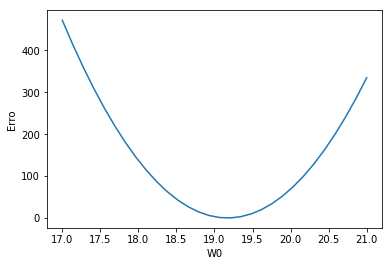

In [23]:
from mpl_toolkits import mplot3d
import matplotlib.pylab as plt

w0 = np.linspace(17, 21, 30) #definir intervalo razoavel para 0.1888 que é o erro medio retornado
w1 = np.linspace(-1, 1, 30) #no video ele definiu uma carcteristica especifica, e agora como definir o intervalo para todas?

ax = plt.axes()
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function_2(W0)

plt.ylabel("Erro")
plt.xlabel("W0")
i=8
plt.plot(W0[i,:], Erro[i,:])
plt.show()
